In [258]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import itertools


In [259]:
# lendo dataset e dividindo em train/test
df = pd.DataFrame(sm.datasets.get_rdataset("Boston", "MASS", cache=True).data)

train, test = train_test_split(df, test_size=0.2)

In [260]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [261]:
#permutações para os paramêtros
k=list(itertools.permutations([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 2))


## Treino do modelo com somente a variável 'lstat'


In [262]:
X = np.array(train["lstat"]).reshape(-1,1)
y = np.array(train["medv"]).reshape(-1,1)

# kfold
kf = KFold(5, shuffle=True, random_state=0)

In [263]:
## Validação Decision Trees - com kfold e as permutações

# variaveis para salvar a permutação com menor erro
best_maxdepth = 0
best_minsplit = 0
best = 100000000

for j,z in k:    
    results = []
    if z!=1:
        for train_l, valid_l in kf.split(X):
            X_train, X_valid = X[train_l], X[valid_l]
            y_train,y_valid = y[train_l], y[valid_l]
            
            model = DecisionTreeRegressor(max_depth=j,min_samples_split=z)
            model.fit(X_train,y_train)
            p = model.predict(X_valid)
            mse = mean_squared_error(y_valid, p)
            results.append(mse)
            
        if np.mean(results) < best:
            best = np.mean(results)
            best_maxdepth = j
            best_minsplit = z

print("Menor MSE =",best," com max_depth =",best_maxdepth," e min_samples_split = ",best_minsplit)

Menor MSE = 33.75595044751806  com max_depth = 3  e min_samples_split =  2


In [264]:
## Validação KNN 
results = []
for i in range(1,70):
    amse = []
    for train_l, valid_l in kf.split(X):
            X_train, X_valid = X[train_l], X[valid_l]
            y_train,y_valid = y[train_l], y[valid_l]
            
            model = KNeighborsRegressor(n_neighbors=i)
            model.fit(X_train, y_train)
            p = model.predict(X_valid)
            mse = mean_squared_error(y_valid,p)
            amse.append(mse)
            
    results.append(np.mean(amse))

print("O melhor k = ",np.argmin(results)+1," com MSE de",min(results))

O melhor k =  33  com MSE de 30.573376212744733


In [265]:
## VALIDAÇÃO LINEAR REGRESSION

results=[]
for train_l, valid_l in kf.split(X):
    X_train, X_valid = X[train_l], X[valid_l]
    y_train,y_valid = y[train_l], y[valid_l]
            
    model = LinearRegression()
    model.fit(X_train, y_train)
    p = model.predict(X_valid)
    mse = mean_squared_error(y_valid,p)
    results.append(mse)
    
print("MSE médio de",np.mean(results),"na validação para o modelo de Regressão Linear")

MSE médio de 41.90683853556736 na validação para o modelo de Regressão Linear


In [266]:
## Modelos nos dados de teste

model_dt = DecisionTreeRegressor(max_depth=3, min_samples_split=2)
model_dt.fit(X, y)
p = model_dt.predict(np.array(test["lstat"]).reshape(-1,1))
mse_dt = mean_squared_error(test["medv"],p)

model_knn = KNeighborsRegressor(n_neighbors=53)
model_knn.fit(X,y)
p = model_knn.predict(np.array(test["lstat"]).reshape(-1,1))
mse_knn = mean_squared_error(test["medv"],p)

model_lr = LinearRegression()
model_lr.fit(X,y)
p = model_lr.predict(np.array(test["lstat"]).reshape(-1,1))
mse_lr = mean_squared_error(test["medv"],p)


print("Decistion Tree MSE = ", mse_dt)
print("KNN MSE = ", mse_knn)
print("Linear Regression MSE = ", mse_knn)

Decistion Tree MSE =  18.667831354142237
KNN MSE =  18.898186571175287
Linear Regression MSE =  18.898186571175287


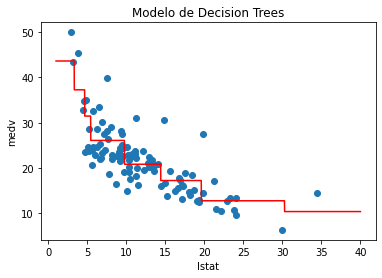

In [267]:
#plot do modelo de Decision Trees
x=np.arange(1,40,0.01)
y=model_dt.predict(x.reshape(-1,1))
plt.scatter(test["lstat"],test["medv"])
plt.title("Modelo de Decision Trees")
plt.xlabel("lstat")
plt.ylabel("medv")
plt.plot(x,y, color="red")

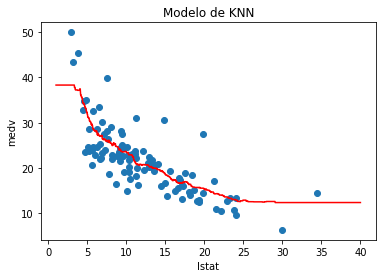

In [268]:
#plot do modelo de KNN
x=np.arange(1,40,0.01)
y=model_knn.predict(x.reshape(-1,1))
plt.scatter(test["lstat"],test["medv"])
plt.title("Modelo de KNN")
plt.xlabel("lstat")
plt.ylabel("medv")
plt.plot(x,y, color="red")

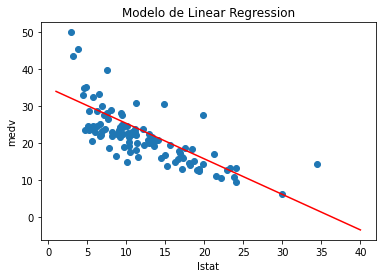

In [269]:
#plot do modelo de Linear Regression
x=np.arange(1,40,0.01)
y=model_lr.predict(x.reshape(-1,1))
plt.scatter(test["lstat"],test["medv"])
plt.title("Modelo de Linear Regression")
plt.xlabel("lstat")
plt.ylabel("medv")
plt.plot(x,y, color="red")

## Treino do modelo com todas as variáveis


In [270]:
X = train.drop("medv",axis=1)
y = np.array(train["medv"]).reshape(-1,1)


# kfold
kf = KFold(5, shuffle=True, random_state=0)

In [271]:
## Validação Decision Trees - com kfold e as permutações

# variaveis para salvar a permutação com menor erro
best_maxdepth = 0
best_minsplit = 0
best = 100000000

for j,z in k:    
    results = []
    if z!=1:
        for train_l, valid_l in kf.split(X):
            X_train, X_valid = X.iloc[train_l], X.iloc[valid_l]
            y_train,y_valid = y[train_l], y[valid_l]
            
            model = DecisionTreeRegressor(max_depth=j,min_samples_split=z)
            model.fit(X_train,y_train)
            p = model.predict(X_valid)
            mse = mean_squared_error(y_valid, p)
            results.append(mse)
            
        if np.mean(results) < best:
            best = np.mean(results)
            best_maxdepth = j
            best_minsplit = z

print("Menor MSE =",best," com max_depth =",best_maxdepth," e min_samples_split = ",best_minsplit)

Menor MSE = 17.735366417258412  com max_depth = 6  e min_samples_split =  13


In [272]:
## Validação KNN 
results = []
for i in range(1,70):
    amse = []
    for train_l, valid_l in kf.split(X):
            X_train, X_valid = X.iloc[train_l], X.iloc[valid_l]
            y_train,y_valid = y[train_l], y[valid_l]
            
            model = KNeighborsRegressor(n_neighbors=i)
            model.fit(X_train, y_train)
            p = model.predict(X_valid)
            mse = mean_squared_error(y_valid,p)
            amse.append(mse)
            
    results.append(np.mean(amse))

print("O melhor k = ",np.argmin(results)+1," com MSE de",min(results))

O melhor k =  4  com MSE de 41.159351080246914


In [273]:
## Validação Linear Regression
results=[]
for train_l, valid_l in kf.split(X):
    X_train, X_valid = X.iloc[train_l], X.iloc[valid_l]
    y_train,y_valid = y[train_l], y[valid_l]
            
    model = LinearRegression()
    model.fit(X_train, y_train)
    p = model.predict(X_valid)
    mse = mean_squared_error(y_valid,p)
    results.append(mse)
    
print("MSE médio de",np.mean(results),"na validação para o modelo de Regressão Linear")

MSE médio de 26.616489207278516 na validação para o modelo de Regressão Linear


In [275]:
## Modelos nos dados de teste

model_dt = DecisionTreeRegressor(max_depth=16, min_samples_split=19)
model_dt.fit(X, y)
p = model_dt.predict(test.drop("medv",axis=1))
mse_dt = mean_squared_error(test["medv"],p)

model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X,y)
p = model_knn.predict(test.drop("medv",axis=1))
mse_knn = mean_squared_error(test["medv"],p)

model_lr = LinearRegression()
model_lr.fit(X,y)
p = model_lr.predict(test.drop("medv",axis=1))
mse_lr = mean_squared_error(test["medv"],p)

print("Decistion Tree MSE = ", mse_dt)
print("KNN MSE = ", mse_knn)
print("Linear Regression MSE = ", mse_lr)

Decistion Tree MSE =  23.059256114244402
KNN MSE =  34.61238562091503
Linear Regression MSE =  15.51244687721035


### É observável que os modelos de árvores de decisão e K Nearest Neighboors possuem desempenho superior a Linear Regression no conjunto de dados utilizando somente a coluna "lstat" para realizar a predição. No entanto, ao adicionar complexidade aos modelos, utilizando todas as variáveis do conjunto de dados, o modelo de Linear Regression possui um desempenho superior.